In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
import cv2
from skimage.transform import resize

###Load the dataset with preprocessing on images

In [2]:
dataset = io.loadmat('/content/Data_hoda_full.mat')

x_train_original = np.squeeze(dataset['Data'][0:3500])
y_train_original = np.squeeze(dataset['labels'][0:3500])
x_test_original = np.squeeze(dataset['Data'][3500:3900])
y_test_original = np.squeeze(dataset['labels'][3500:3900])

# Resize
x_train_5by5 = [cv2.resize(img, (28, 28)) for img in x_train_original]
x_test_5by5 = [cv2.resize(img, (28, 28)) for img in x_test_original]
x_train = [x.reshape(784) for x in x_train_5by5]
x_test = [x.reshape(784) for x in x_test_5by5]

# Preprocess input data for Keras. 
x_train = np.array(x_train)
y_train = keras.utils.np_utils.to_categorical(y_train_original, num_classes=10)
x_test = np.array(x_test)
y_test = keras.utils.np_utils.to_categorical(y_test_original, num_classes=10)

# Normalization and changing the format for Keras
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Reshape to original image shape (n x 784) ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_train.reshape(-1, 28, 28, 1)

# Train and Validation set
x_val = x_train[:200]
x_train = x_train[200:]
y_val = y_train[:200]
y_train = y_train[200:]

In [3]:
model = Sequential()
model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu', input_shape=(28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(10, activation = 'softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

###Let's compile our model

In [5]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

###Let's fit our model on training data

In [6]:
memoryM = model.fit(x_train, y_train, epochs = 200, batch_size = 256, validation_data = (x_val, y_val))

Epoch 1/200
13/13 [==============================] - 5s 314ms/step - loss: 2.1373 - accuracy: 0.2409 - val_loss: 1.7358 - val_accuracy: 0.5600
Epoch 2/200
13/13 [==============================] - 5s 386ms/step - loss: 1.3674 - accuracy: 0.5558 - val_loss: 0.7674 - val_accuracy: 0.7850
Epoch 3/200
13/13 [==============================] - 5s 389ms/step - loss: 0.8332 - accuracy: 0.7291 - val_loss: 0.4885 - val_accuracy: 0.8300
Epoch 4/200
13/13 [==============================] - 5s 405ms/step - loss: 0.6269 - accuracy: 0.7897 - val_loss: 0.3530 - val_accuracy: 0.8750
Epoch 5/200
13/13 [==============================] - 5s 357ms/step - loss: 0.5244 - accuracy: 0.8173 - val_loss: 0.2880 - val_accuracy: 0.9050
Epoch 6/200
13/13 [==============================] - 3s 214ms/step - loss: 0.4024 - accuracy: 0.8667 - val_loss: 0.2381 - val_accuracy: 0.9100
Epoch 7/200
13/13 [==============================] - 3s 215ms/step - loss: 0.3494 - accuracy: 0.8806 - val_loss: 0.1851 - val_accuracy: 0.9400

<Figure size 432x288 with 0 Axes>

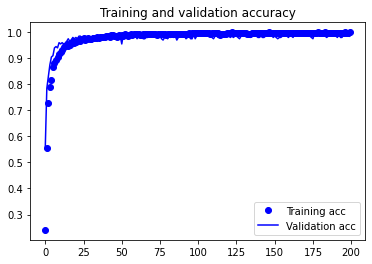

<Figure size 432x288 with 0 Axes>

In [7]:
acc = memoryM.history['accuracy']
val_acc = memoryM.history['val_accuracy']
loss = memoryM.history['loss']
val_loss = memoryM.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

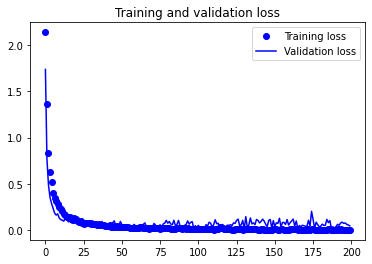

In [8]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()